# TP 2 : Sondage

#### Consignes.
>   
Répondre à chaque question dans les cellules que vous créerez après la question correspondante.
La note prendra compte de la **présentation et de la clareté des réponses**.
 
>Envoyez le tp sur le mail
sholom.schechtman@telecom-sudparis.eu avec comme sujet: **TP2_GR1_NOM_PRENOM** si vous êtes groupe 1 et **TP2_GR2_NOM_PRENOM** si vous êtes groupe 2. C'est **important** pour que votre tp ne se perde pas et soit **noté**.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import seaborn as sns
%matplotlib inline

# Exercice 1 : plan de sondage simple



> ### 1. 
Importer le fichier "pop_paroisses.sas7bdat" dans une dataframe de nom `paroisse` avec la commande `pd.read_sas`. Faites apparaître les 5 premières lignes.
Remarque : vous pouvez utiliser l'option `encoding="latin1"` pour avoir le français affiché correctement.

In [2]:
paroisse = pd.read_sas("pop_paroisses.sas7bdat", encoding="latin1")

In [3]:
paroisse.head()

,paroisse,code,naissance,deces,mar,mrc,region,pop99,pop00,pop01,strate
0,Berthier-sur-Mer,18065.0,11.0,8.0,2.0,18.0,12.0,1271.0,1306.0,1285.0,2.0
1,Brébeuf,78075.0,7.0,1.0,3.0,78.0,15.0,772.0,782.0,789.0,1.0
2,Calixa-Lavallée,59030.0,8.0,5.0,7.0,59.0,16.0,493.0,491.0,491.0,1.0
3,Courcelles,30090.0,9.0,3.0,3.0,30.0,5.0,988.0,996.0,975.0,2.0
4,Grande-Vallée,3020.0,14.0,6.0,2.0,3.0,11.0,1432.0,1390.0,1362.0,2.0


> ### 2. 
Utiliser l'option `.sample` d'une dataframe panda pour sélectionner un échantillon de 25 individus en utilisant un plan de sondage simple et sans remise a probabilité égale. Sauvegarder les résultats dans une dataframe de nom `par_sam`.

In [4]:
par_sam = paroisse.sample(n=25, replace=False, random_state=42)

In [5]:
par_sam.head()

,paroisse,code,naissance,deces,mar,mrc,region,pop99,pop00,pop01,strate
30,Saint-Alexis-des-Monts,51065.0,22.0,15.0,6.0,51.0,4.0,2823.0,2828.0,2824.0,4.0
172,Saint-Patrice-de-Sherrington,68025.0,18.0,13.0,2.0,68.0,16.0,1981.0,1998.0,1967.0,3.0
84,Sainte-Hélène,14025.0,3.0,6.0,4.0,14.0,1.0,937.0,930.0,915.0,2.0
199,Saint-Tharcisius,7070.0,6.0,4.0,1.0,7.0,1.0,537.0,524.0,513.0,1.0
60,Saint-Donat,9030.0,13.0,13.0,1.0,9.0,1.0,811.0,800.0,782.0,1.0


> ### 3.
Calculer le $\pi$-estimateur du total et de la moyenne des naissances.

In [6]:
N = len(paroisse) # Taille de la population totale
n = len(par_sam)
total_naissance = par_sam["naissance"].sum() # Somme des nombres de naissances dans l'échantillon
T = (N / n) * total_naissance # Notre Pi-Estimateur du total des naissances

In [7]:
# Calculer le pi-estimateur de la moyenne des naissances
moyenne_naissances = par_sam['naissance'].mean()  # Moyenne des nombres de naissances dans l'échantillon
M = moyenne_naissances  # Calcul du pi-estimateur de la moyenne

In [8]:
# Afficher les résultats
print("Pi-estimateur du total des naissances (T) : ", T)
print("Pi-estimateur de la moyenne des naissances (M) : ", M)

Pi-estimateur du total des naissances (T) :  2192.4
Pi-estimateur de la moyenne des naissances (M) :  10.44


> ### 3.
Refaire le sondage 100 fois, et tracer un graphique ou apparaissent la vraie valeur du total et ses valeurs estimées. Que remarque-t-on?

Moyenne des valeurs du Pi-estimateur du total :  2503.956
Variance du Pi-estimateur du total :  351513.9184000001 

Moyenne des valeurs du Pi-estimateur de la moyenne :  11.9236
Variance du Pi-estimateur de la moyenne :  7.970837151927438


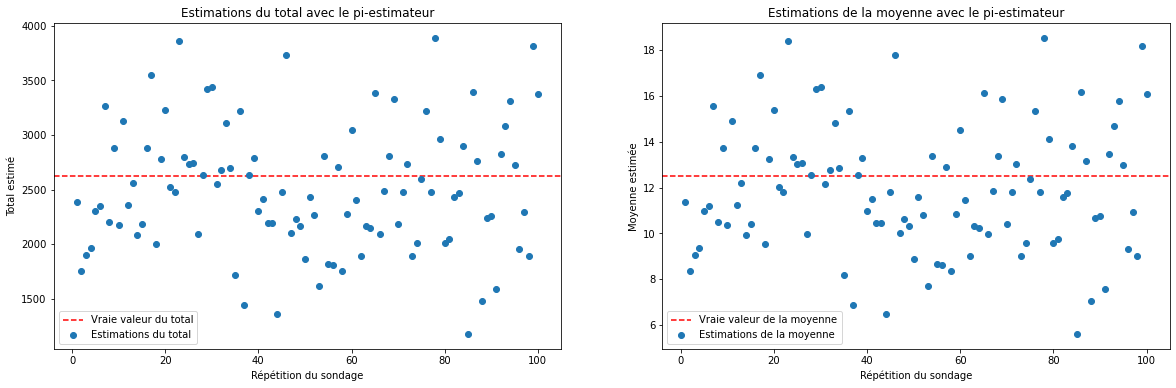

In [9]:
n_repetitions = 100
taille_echantillon = 25

# Stocke les valeurs générées
total_estime = np.zeros(n_repetitions)
moyenne_estime = np.zeros(n_repetitions)


for i in range(n_repetitions):
    # Effectuer un nouvel échantillonnage de la dataframe
    echantillon = paroisse.sample(n=taille_echantillon, replace=False, random_state=i)
    
    # Calculer la somme des nombres de naissances dans l'échantillon
    total_naissances = echantillon['naissance'].sum()
    moyenne_naissances = echantillon['naissance'].mean()
    
    # Calculer la valeur estimée du total en utilisant le pi-estimateur
    total_estime[i] = (len(paroisse) / len(echantillon)) * total_naissances
    moyenne_estime[i] = moyenne_naissances

# Par ailleurs les vraies valeurs sont :
vrai_total = paroisse['naissance'].sum()
vrai_moyenne = paroisse["naissance"].mean()

# calcul des variances :
var_estim_total_pi = ((total_estime - paroisse["naissance"].sum())**2).mean()
var_estim_moyenne_pi = ((moyenne_estime - paroisse["naissance"].mean())**2).mean()

# Afficher les résultats
print("Moyenne des valeurs du Pi-estimateur du total : ", total_estime.mean())
print("Variance du Pi-estimateur du total : ", var_estim_total_pi.mean(),'\n')
print("Moyenne des valeurs du Pi-estimateur de la moyenne : ", moyenne_estime.mean())
print("Variance du Pi-estimateur de la moyenne : ", var_estim_moyenne_pi.mean())

# Créer un graphique pour afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].axhline(y=vrai_total, color='red', linestyle='dashed', label='Vraie valeur du total')  # Vraie valeur du total
ax[0].plot(range(1, n_repetitions+1), total_estime, 'o', label='Estimations du total')  # Estimations du total
ax[0].set_xlabel('Répétition du sondage')
ax[0].set_ylabel('Total estimé')
ax[0].set_title('Estimations du total avec le pi-estimateur')
ax[0].legend()

ax[1].axhline(y=vrai_moyenne, color='red', linestyle='dashed', label='Vraie valeur de la moyenne')  # Vraie valeur du total
ax[1].plot(range(1, n_repetitions+1), moyenne_estime, 'o', label='Estimations de la moyenne')  # Estimations de la moyenne
ax[1].set_xlabel('Répétition du sondage')
ax[1].set_ylabel('Moyenne estimée')
ax[1].set_title('Estimations de la moyenne avec le pi-estimateur')
ax[1].legend()

plt.show()

# Exercice 2 

> ### 1. 
Importer le fichier "pop.sas7bdat" dans une dataframe de nom `lib`. Ce fichier contient 1000 réalisations d'une variable y.

In [10]:
lib = pd.read_sas("pop.sas7bdat")

In [11]:
lib.head()

,i,y
0,1.0,83.631107
1,2.0,115.620297
2,3.0,73.585786
3,4.0,130.878799
4,5.0,58.350731


>### 2.
Vérifier que la moyenne des réalisations est bien 100.

In [12]:
lib["y"].mean()

100.0000000338361

>OK

>### 3.
Effectuer `100` fois un plan de songade (sans remise et à probabilités égales) de taille `10`. Sauvegarder les moyennes estimées dans une array de nom `estim`.

In [13]:
nb_sondages = 100
taille_echantillon = 10
# Notre tableau pour stocker les valeurs estimées
estim = np.zeros(n_repetitions)

# Réaliser le sondage et calculer les moyennes estimées
for i in range(n_repetitions):
    # Effectuer un nouvel échantillonnage de la dataframe
    echantillon = lib.sample(n=taille_echantillon, replace=False, random_state=i)
    
    # Calculer la moyenne des valeurs dans l'échantillon
    moyenne_estimee = echantillon["y"].mean()
    
    # Sauvegarder la moyenne estimée dans l'array
    estim[i] = moyenne_estimee

>### 4. 

On rappelle que l'erreur relative de l'estimation de $m$ par $\hat m$
$$\frac{\hat m- m}{|m|}\, .$$

Calculer les erreurs relatives des sondages effectués et tracer la courbe correspondante.
On tracera en rouge la ligne horizontale $y=0$.

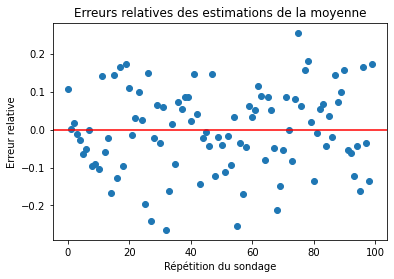

In [14]:
nb_sondages = 100
taille_echantillon = 10
# Notre tableau pour stocker les valeurs estimées
estim = np.zeros(n_repetitions)

# Réaliser le sondage et calculer les moyennes estimées
for i in range(n_repetitions):
    # Effectuer un nouvel échantillonnage de la dataframe
    echantillon = lib.sample(n=taille_echantillon, replace=False, random_state=i)
    
    # Calculer la moyenne des valeurs dans l'échantillon
    moyenne_estimee = echantillon["y"].mean()
    
    # Sauvegarder la moyenne estimée dans l'array
    estim[i] = moyenne_estimee

# la vraie valeur de la moyenne
moyenne_reelle = lib["y"].mean()

# Calculer les erreurs relatives
erreurs_relatives = (estim - moyenne_reelle) / np.abs(moyenne_reelle)

# Tracer la courbe des erreurs relatives
plt.plot(erreurs_relatives, 'o')
plt.axhline(y=0, color='red')  # Ligne horizontale en rouge à y=0
plt.xlabel('Répétition du sondage')
plt.ylabel('Erreur relative')
plt.title('Erreurs relatives des estimations de la moyenne')
plt.show()

>### 5.
Calculer la moyenne des moyennes des 100 echantillons. Comparer à la vraie moyenne.

In [15]:
# On a comme moyenne :
moyenne_moyenne = estim.mean()

print("On obtient comme moyenne des moyennes " + str(moyenne_moyenne) + " par rapport à la vraie moyenne : " + str(moyenne_reelle))

On obtient comme moyenne des moyennes 99.8186680705952 par rapport à la vraie moyenne : 100.0000000338361


>### 6. 
On veut maintenant estimer la variance de notre estimateur. Calculer sa variance empirique en se rappelant que la vraie moyenne est de `100`.

>Commenter.

In [16]:
moyenne_reelle = 100

# Calculer les écarts entre les estimations et la vraie valeur
ecarts = estim - moyenne_reelle

# Calculer les carrés des écarts
carres_ecarts = np.square(ecarts)

# Variance empirique
variance_empirique = np.mean(carres_ecarts)

# Afficher la variance empirique
print("Variance empirique de l'estimateur :", variance_empirique)

Variance empirique de l'estimateur : 117.2282861258711


>Pour une vraie valeur de moyenne de 100, ici une variance de 117 parait beaucoup. Cet estimateur n'est pas très performant...

>### 7.
Refaire l'expérience précédente pour des valeurs croissantes de la taille du sondage. Que remarque-t-on?

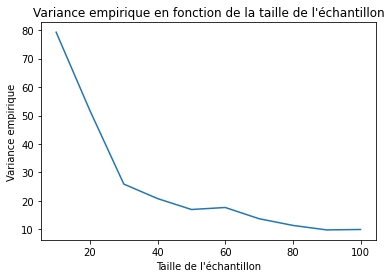

In [17]:
nb_sondages = 100
tailles_echantillon = np.arange(10, 101, 10)  # Tailles de l'échantillon allant de 10 à 100 avec un pas de 10

# Liste pour sauvegarder les variances empiriques
variances_empiriques = []

for taille_echantillon in tailles_echantillon:
    # Les valeurs estimées
    estim = np.zeros(nb_sondages)
    
    for i in range(nb_sondages):
        # Effectuer un nouvel échantillonnage de la dataframe
        echantillon = lib.sample(n=taille_echantillon, replace=False)
        
        # Calculer la moyenne des valeurs dans l'échantillon
        estim[i] = echantillon["y"].mean()
    
    # Calculer les écarts entre les estimations et la vraie valeur
    ecarts = estim - moyenne_reelle
    
    # Calculer les carrés des écarts
    carres_ecarts = np.square(ecarts)
    
    # Calculer la variance empirique
    variance_empirique = np.mean(carres_ecarts)
    
    # On save le résultat
    variances_empiriques.append(variance_empirique)

# Convertir la liste en array numpy
variances_empiriques = np.array(variances_empiriques)

# Tracer le graphique des variances empiriques en fonction de la taille de l'échantillon
plt.plot(tailles_echantillon, variances_empiriques)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Variance empirique')
plt.title('Variance empirique en fonction de la taille de l\'échantillon')
plt.show()

>On remarque que la variance empirique diminue à mesure que la taille de l'échantillon augmente. ce qui est logique, car la variance de l'estimateur est inversement proportionnelle à la taille de l'échantillon. Cela signifie que plus nous avons de données dans notre échantillon, plus notre estimation de la moyenne sera précise. Logique aussi puisque si on a tout le dataset comme echantillon on a directement accès à la bonne estimation donc variace nulle.

## Exercice 3 : plan de sondage stratifié

L’objectif de cet exercice est de réaliser un plan de sondage stratifié et de faire ensuite une estimation par le
$\pi$-estimateur.

On travaillera sur la dataframe `paroisse` de l'exercice 1.

>### 1.
Que font les commandes suivantes? 

In [18]:
paroisse.groupby("strate", group_keys=False).size()

strate
1.0    105
2.0     63
3.0     21
4.0     21
dtype: int64

In [19]:
paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(2))

,paroisse,code,naissance,deces,mar,mrc,region,pop99,pop00,pop01,strate
99,Sainte-Sabine,28065.0,1.0,6.0,0.0,28.0,12.0,424.0,426.0,408.0,1.0
98,Sainte-Rose-du-Nord,94030.0,2.0,0.0,5.0,94.0,2.0,422.0,408.0,416.0,1.0
68,Sainte-Barbe,69065.0,16.0,5.0,2.0,69.0,16.0,1301.0,1316.0,1324.0,2.0
96,Sainte-Marie-Salomé,63005.0,13.0,6.0,1.0,63.0,14.0,1212.0,1237.0,1256.0,2.0
83,Sainte-Geneviève-de-Berthier,52040.0,2.0,1.0,0.0,52.0,14.0,2490.0,2471.0,2466.0,3.0
157,Saint-Michel,68050.0,30.0,17.0,8.0,68.0,16.0,2601.0,2604.0,2619.0,3.0
7,L'Ange-Gardien,21040.0,36.0,11.0,2.0,21.0,3.0,2858.0,2844.0,2888.0,4.0
140,Saint-Lambert-de-Lauzon,25005.0,52.0,20.0,5.0,26.0,12.0,4779.0,4847.0,4904.0,4.0


In [20]:
paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(frac=0.3))

,paroisse,code,naissance,deces,mar,mrc,region,pop99,pop00,pop01,strate
39,Saint-Augustin-de-Woburn,30005.0,9.0,0.0,0.0,30.0,5.0,745.0,719.0,717.0,1.0
118,Saint-Germain,14045.0,3.0,1.0,1.0,14.0,1.0,296.0,290.0,291.0,1.0
147,Saint-Louis-de-Gonzague-du-Cap-Tourmente,21015.0,0.0,0.0,1.0,21.0,3.0,4.0,4.0,4.0,1.0
101,Sainte-Sophie-de-Lévrard,38040.0,13.0,6.0,0.0,38.0,17.0,810.0,829.0,807.0,1.0
14,Notre-Dame-de-Lourdes,32080.0,7.0,3.0,0.0,32.0,17.0,731.0,710.0,713.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
134,Saint-Joseph-de-Beauce,27040.0,11.0,8.0,1.0,27.0,12.0,4456.0,4431.0,4478.0,4.0
65,Sainte-Anne-de-Sorel,53065.0,15.0,16.0,6.0,53.0,16.0,2774.0,2749.0,2730.0,4.0
124,Saint-Honoré,29040.0,24.0,5.0,4.0,94.0,2.0,3886.0,3864.0,3840.0,4.0
31,Saint-Ambroise-de-Kildare,61040.0,31.0,12.0,7.0,61.0,14.0,3498.0,3473.0,3497.0,4.0


- `paroisse.groupby("strate", group_keys=False).size()` : Cette commande groupe les données par element de la colonne "strate", et calcule la taille de chaque groupe en utilisant la fonction size(). L'option group_keys=False permet de ne pas inclure les clés de groupe dans le résultat.

- `paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(2))` : Cette commande groupe les données par élément dans la colonne "strate", puis applique la fonction sample(2) à chaque groupe. La fonction sample(2) sélectionne aléatoirement 2 éléments dans chaque groupe. Le résultat sera une nouvelle dataframe qui contiendra 2 échantillons aléatoires de chaque groupe.

- `paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(frac=0.3))`: Cette commande groupe les données par élément dans la colonne "strate", puis applique la fonction sample(frac=0.3) à chaque groupe. La fonction sample(frac=0.3) sélectionne aléatoirement 30% des éléments dans chaque groupe. Le résultat sera une nouvelle dataframe qui contiendra 30% des éléments aléatoires de chaque groupe.

>### 2. 
Completer le code suivant pour sélectionner un échantillon de `(5, 8, 5, 7)` individus dans les 4 strates.

In [21]:
# Définir les tailles d'échantillon pour chaque strate
taille_echantillon_strates = pd.Series([5, 8, 5, 7], index=[1., 2., 3., 4.])

# Effectuer le sondage stratifié
echantillon_stratifie = paroisse.groupby('strate').apply(lambda x: x.sample(taille_echantillon_strates[x.name]))

# Réinitialiser l'index du DataFrame résultant
echantillon_stratifie = echantillon_stratifie.reset_index(drop=True)

# Afficher l'échantillon stratifié résultant
print(echantillon_stratifie)

                        paroisse     code  naissance  deces   mar   mrc  \
0          Saint-Roch-de-Mékinac  35045.0        4.0    4.0   1.0  35.0   
1         Saint-Marc-du-Lac-Long  13020.0        6.0    4.0   4.0  13.0   
2                     Saint-Aimé  53015.0       12.0    8.0   1.0  53.0   
3     Saint-Joseph-de-Kamouraska  14030.0        5.0    4.0   1.0  14.0   
4                  Saint-Gilbert  34060.0        2.0    3.0   0.0  34.0   
5    Sainte-Anne-de-la-Pocatière  14090.0        1.0    0.0   0.0  14.0   
6                  Saint-Barnabé  51025.0        6.0    4.0   0.0  51.0   
7                   Saint-Urbain  16055.0        8.0   13.0   3.0  16.0   
8     Saint-Narcisse-de-Rimouski  10015.0       11.0    5.0   1.0  10.0   
9                   Sainte-Barbe  69065.0       16.0    5.0   2.0  69.0   
10                  Saint-Fabien  10070.0       21.0   14.0   3.0  10.0   
11                 Saint-Joachim  21020.0       16.0    8.0   3.0  21.0   
12          Sainte-Anne-d

>### 4. 
Calculer les probabilités d'inclusions et les poids d'échnatillonage pour chaque strate.

In [22]:
# Calcul des probabilités d'inclusion pour chaque strate
probabilites_inclusion = taille_echantillon_strates / paroisse.groupby("strate").size()

# Calcul des poids d'échantillonnage pour chaque strate
poids_echantillonnage = (1 / probabilites_inclusion)

# Afficher les résultats
print("Probabilités d'inclusion dans chaque strate :")
print(probabilites_inclusion)
print("\n")
print("Poids d'échantillonnage dans chaque strate :")
print(poids_echantillonnage)

Probabilités d'inclusion dans chaque strate :
1.0    0.047619
2.0    0.126984
3.0    0.238095
4.0    0.333333
dtype: float64


Poids d'échantillonnage dans chaque strate :
1.0    21.000
2.0     7.875
3.0     4.200
4.0     3.000
dtype: float64


> ### 5. 
Calculer les $\pi$-estimateurs de la moyenne et du total. On effectuera $100$ fois l'expérience. Comparer ces résultats avec ceux de l'exercice 1.

Moyenne des valeurs du Pi-estimateur du total :  2657.33175
Variance du Pi-estimateur du total :  191580.10481874994 

Moyenne des valeurs du Pi-estimateur de la moyenne :  12.653960714285715
Variance du Pi-estimateur de la moyenne :  4.344220063917233


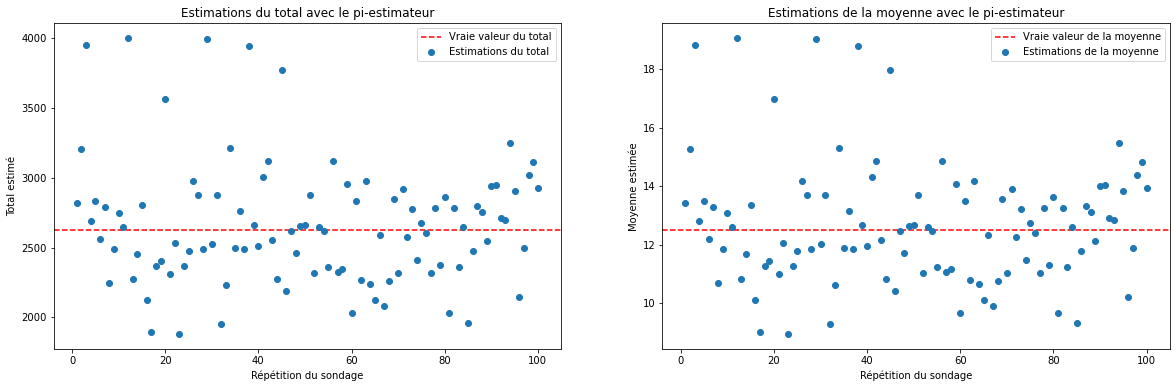

In [23]:
nb_repetitions = 100 
estim_moyenne_pi = np.zeros(nb_repetitions)
estim_total_pi = np.zeros(nb_repetitions)

for i in range(nb_repetitions):
    # Effectuer le sondage stratifié
    echantillon_stratifie = paroisse.groupby('strate').apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
    echantillon_stratifie = echantillon_stratifie.reset_index(drop=True)
    
    # Calculer l'estimation de la moyenne par pi-estimation
    estim_moyenne_pi[i] = (echantillon_stratifie.groupby("strate").sum()["naissance"] * poids_echantillonnage).sum() / len(paroisse)
    
    # Calculer l'estimation du total par pi-estimation
    estim_total_pi[i] = (echantillon_stratifie.groupby("strate").sum()["naissance"] * poids_echantillonnage).sum()

# calcul des variances :
var_estim_total_pi = ((estim_total_pi - paroisse["naissance"].sum())**2).mean()
var_estim_moyenne_pi = ((estim_moyenne_pi - paroisse["naissance"].mean())**2).mean()

# Afficher les résultats
print("Moyenne des valeurs du Pi-estimateur du total : ", estim_total_pi.mean())
print("Variance du Pi-estimateur du total : ", var_estim_total_pi.mean(),'\n')
print("Moyenne des valeurs du Pi-estimateur de la moyenne : ", estim_moyenne_pi.mean())
print("Variance du Pi-estimateur de la moyenne : ", var_estim_moyenne_pi.mean())

# Créer un graphique pour afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].axhline(y=vrai_total, color='red', linestyle='dashed', label='Vraie valeur du total')  # Vraie valeur du total
ax[0].plot(range(1, n_repetitions+1), estim_total_pi, 'o', label='Estimations du total')  # Estimations du total
ax[0].set_xlabel('Répétition du sondage')
ax[0].set_ylabel('Total estimé')
ax[0].set_title('Estimations du total avec le pi-estimateur')
ax[0].legend()

ax[1].axhline(y=vrai_moyenne, color='red', linestyle='dashed', label='Vraie valeur de la moyenne')  # Vraie valeur du total
ax[1].plot(range(1, n_repetitions+1), estim_moyenne_pi, 'o', label='Estimations de la moyenne')  # Estimations de la moyenne
ax[1].set_xlabel('Répétition du sondage')
ax[1].set_ylabel('Moyenne estimée')
ax[1].set_title('Estimations de la moyenne avec le pi-estimateur')
ax[1].legend()

plt.show()

> Valeurs réelles :

Total des naissances (T) :  2624.0

Moyenne des naissances (M) :  12.49

> On obtient ici un estimateur beaucoup plus proche des valeurs réelles mais surtout avec des variances plus faibles par rapport aux estimateurs de l'exercice 1. Ces estimateurs parrait donc meilleur que celui de l'exercice 1 !



>### 6.
Effectuer sur le modèle des questions précédentes  un plan de sondage stratifié selon la méthode proportionnelle. Comparer aux résultats précédents.

Moyenne des valeurs du Pi-estimateur du total :  2398.704
Variance du Pi-estimateur du total :  245020.29759999993 

Moyenne des valeurs du Pi-estimateur de la moyenne :  11.4224
Variance du Pi-estimateur de la moyenne :  5.556015818594106


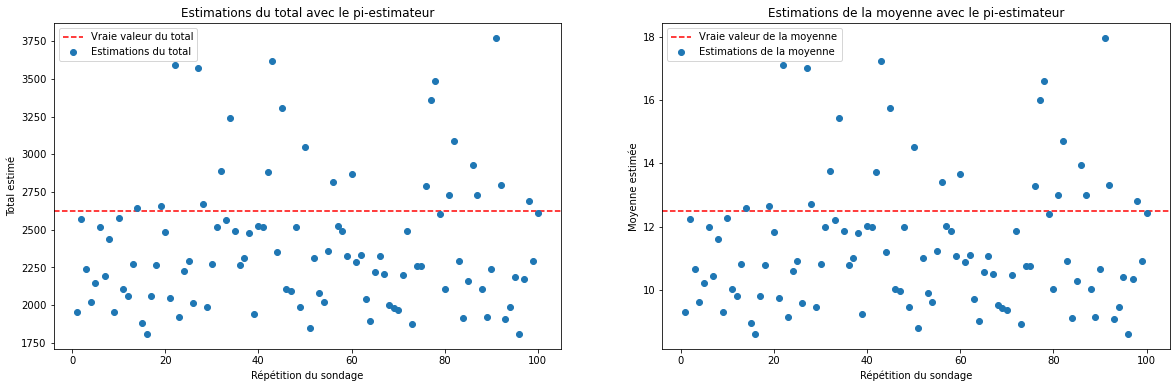

In [24]:
# Pour garder une cohérence et pouvoir comparer avec l'exercice 1 il nous faut :
taille_echantillon = 25

# Calculer les probabilités d'inclusion pour chaque strate
probabilites_inclusion = taille_echantillon / len(paroisse)

# Calculer les poids d'échantillonnage pour chaque strate
poids_echantillonnage = (1 / probabilites_inclusion)

nb_repetitions = 100 
estim_moyenne_pi_prop = np.zeros(nb_repetitions)
estim_total_pi_prop = np.zeros(nb_repetitions)

for i in range(nb_repetitions):
    # Effectuer le sondage stratifié proportionnel
    echantillon_stratifie_proportionnel = paroisse.groupby("strate", group_keys=False).apply(lambda x: x.sample(frac=probabilites_inclusion))
    echantillon_stratifie_proportionnel = echantillon_stratifie_proportionnel.reset_index(drop=True)

    # pi-estimation de la moyenne
    estim_moyenne_pi_prop[i] = (echantillon_stratifie_proportionnel.groupby("strate").sum()["naissance"]).sum() / taille_echantillon
    
    # pi-estimation du total
    estim_total_pi_prop[i] = poids_echantillonnage * (echantillon_stratifie_proportionnel.groupby("strate").sum()["naissance"]).sum()

# calcul des variances :
var_estim_total_pi = ((estim_total_pi_prop - paroisse["naissance"].sum())**2).mean()
var_estim_moyenne_pi = ((estim_moyenne_pi_prop - paroisse["naissance"].mean())**2).mean()

# Afficher les résultats
print("Moyenne des valeurs du Pi-estimateur du total : ", estim_total_pi_prop.mean())
print("Variance du Pi-estimateur du total : ", var_estim_total_pi.mean(),'\n')
print("Moyenne des valeurs du Pi-estimateur de la moyenne : ", estim_moyenne_pi_prop.mean())
print("Variance du Pi-estimateur de la moyenne : ", var_estim_moyenne_pi.mean())

# Créer un graphique pour afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].axhline(y=vrai_total, color='red', linestyle='dashed', label='Vraie valeur du total')  # Vraie valeur du total
ax[0].plot(range(1, n_repetitions+1), estim_total_pi_prop, 'o', label='Estimations du total')  # Estimations du total
ax[0].set_xlabel('Répétition du sondage')
ax[0].set_ylabel('Total estimé')
ax[0].set_title('Estimations du total avec le pi-estimateur')
ax[0].legend()

ax[1].axhline(y=vrai_moyenne, color='red', linestyle='dashed', label='Vraie valeur de la moyenne')  # Vraie valeur du total
ax[1].plot(range(1, n_repetitions+1), estim_moyenne_pi_prop, 'o', label='Estimations de la moyenne')  # Estimations de la moyenne
ax[1].set_xlabel('Répétition du sondage')
ax[1].set_ylabel('Moyenne estimée')
ax[1].set_title('Estimations de la moyenne avec le pi-estimateur')
ax[1].legend()

plt.show()

> Les résultats de notre pi-estimateurs du total et de la moyenne ne sont pas concluant... Leur variances sont plus élevé que ce qu'on a pu trouver précédement et leur moyenne éloignée du résultat attendu... Mais toujours mieux qu'a l'exercice 1 en terme de variance. Or cette méthode devrait être beaucup plus performante que la stratifiée simple... les nombres d'indivudu par strates étaient peut être déjà optimisé dans la question précédente...

> A noter que le dataset paret petit pour les test que l'on réalise, 210 personnes et on fait 25*100=2500 personnes pour nos moyennes... Sur un plus grand dataset on risque de mieux pouvoir différencier nos différentes méthodes

## Exercice 4 : Plan stratifié optimal

Dans cet exercice on veut coder le plan stratifié optimal pour le total. On travaillera toujours sur la dataframe `paroisse`.

>### 1.
Calculez les variances corrigées pour chaque strate

In [25]:
# Calcul des variances corrigées pour chaque strates
corrected_var = []

grouped = paroisse.groupby("strate")
for name, group in grouped:
    N_i = len(group)
    y_i_mean = group["naissance"].mean()
    s_i2 = (1/(N_i -1)) * np.sum((group["naissance"] - y_i_mean)**2)
    corrected_var.append(s_i2)
    print(f"Variance corrigée pour la strate {name:.0f} : {s_i2:.2f}")

Variance corrigée pour la strate 1 : 40.35
Variance corrigée pour la strate 2 : 30.56
Variance corrigée pour la strate 3 : 74.56
Variance corrigée pour la strate 4 : 1192.15


>### 2.
Calculer  les tailles optimales d'échantillons pour chaque strate quand la taille globale de l'échantillon est fixée à 25.

In [26]:
# Calcul des tailles d'échantillons optimales pour chaque strate
n=25

# Total des variances
N_j = np.array(paroisse["strate"].value_counts().tolist())
total_variance = (N_j * np.sqrt(corrected_var)).sum()

#stockage du résultat
tailles_strates_optimales = (n * N_j * np.sqrt(corrected_var) / total_variance).round()
tailles_strates_optimales = tailles_strates_optimales.astype(int)

>### 3.
Effectuer un plan de sondage stratifié avec les tailles calculées précédemment. Comparer aux méthodes effectuées précédemment.

Moyenne des valeurs du Pi-estimateur du total :  2587.1883333333335
Variance du Pi-estimateur du total :  105013.78472222223 

Moyenne des valeurs du Pi-estimateur de la moyenne :  12.319944444444445
Variance du Pi-estimateur de la moyenne :  2.381264959687579


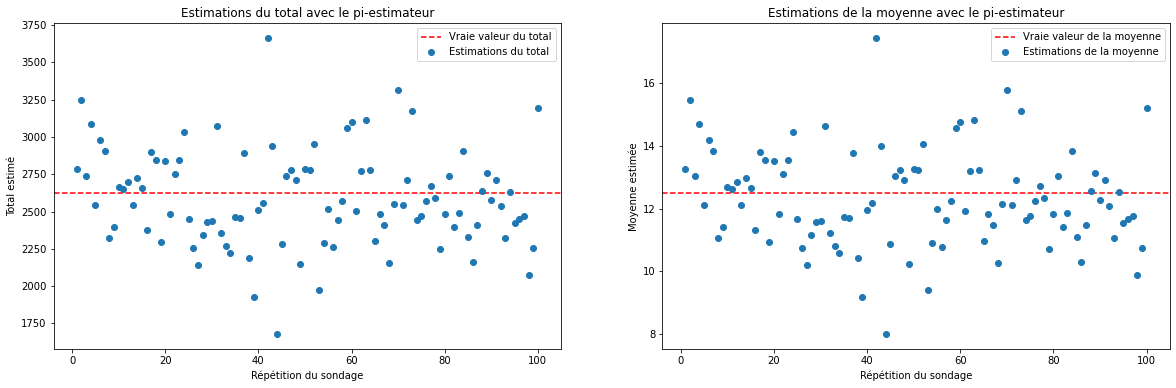

In [27]:
# On récupère les tailles optimales pour  chaques strates
taille_echantillon_strates = pd.Series(tailles_strates_optimales, index=[1., 2., 3., 4.])

# Calcul des probabilités d'inclusion pour chaque strate
probabilites_inclusion = taille_echantillon_strates / paroisse.groupby("strate").size()

# Calcul des poids d'échantillonnage pour chaque strate
poids_echantillonnage = (1 / probabilites_inclusion)

nb_repetitions = 100 
estim_moyenne_pi = np.zeros(nb_repetitions)
estim_total_pi = np.zeros(nb_repetitions)

for i in range(nb_repetitions):
    # Effectuer le sondage stratifié
    echantillon_stratifie = paroisse.groupby('strate').apply(lambda x: x.sample(taille_echantillon_strates[x.name]))
    echantillon_stratifie = echantillon_stratifie.reset_index(drop=True)
    
    # Calculer l'estimation de la moyenne par pi-estimation
    estim_moyenne_pi[i] = (echantillon_stratifie.groupby("strate").sum()["naissance"] * poids_echantillonnage).sum() / len(paroisse)
    
    # Calculer l'estimation du total par pi-estimation
    estim_total_pi[i] = (echantillon_stratifie.groupby("strate").sum()["naissance"] * poids_echantillonnage).sum()

# calcul des variances :
var_estim_total_pi = ((estim_total_pi - paroisse["naissance"].sum())**2).mean()
var_estim_moyenne_pi = ((estim_moyenne_pi - paroisse["naissance"].mean())**2).mean()

# Afficher les résultats
print("Moyenne des valeurs du Pi-estimateur du total : ", estim_total_pi.mean())
print("Variance du Pi-estimateur du total : ", var_estim_total_pi.mean(),'\n')
print("Moyenne des valeurs du Pi-estimateur de la moyenne : ", estim_moyenne_pi.mean())
print("Variance du Pi-estimateur de la moyenne : ", var_estim_moyenne_pi.mean())

# Créer un graphique pour afficher les résultats
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].axhline(y=vrai_total, color='red', linestyle='dashed', label='Vraie valeur du total')  # Vraie valeur du total
ax[0].plot(range(1, n_repetitions+1), estim_total_pi, 'o', label='Estimations du total')  # Estimations du total
ax[0].set_xlabel('Répétition du sondage')
ax[0].set_ylabel('Total estimé')
ax[0].set_title('Estimations du total avec le pi-estimateur')
ax[0].legend()

ax[1].axhline(y=vrai_moyenne, color='red', linestyle='dashed', label='Vraie valeur de la moyenne')  # Vraie valeur du total
ax[1].plot(range(1, n_repetitions+1), estim_moyenne_pi, 'o', label='Estimations de la moyenne')  # Estimations de la moyenne
ax[1].set_xlabel('Répétition du sondage')
ax[1].set_ylabel('Moyenne estimée')
ax[1].set_title('Estimations de la moyenne avec le pi-estimateur')
ax[1].legend()

plt.show()

> Cette méthode donne une meilleure variances pour les deux estimateurs par rapport au deux précédents exos ! Des valeurs plus proches des moyennes réelles ! Il est le meilleur estimateur obtenu d'un point de vu de la varaince et de l'estimation en propre. Par rapport à l'exercice 1 et 2 ! En revanche il nécsssite quelques préerquis ...

>### 5. 
Quel est l'incovénient pratique de cette méthode?

L'inconvénient pratique de cette méhode peut venir de deux points :

- Complexe à mettre en œuvre dans la pratique, car elle nécessite de calculer les tailles d'échantillons optimales pour chaque strate en fonction des variances estimées dans chaque strate. Cela nécessite donc des données supplémentaires sur les variances des données dans chaque strate + du calcul pour ajuster les tailles d'échantillons.

- Sensible aux erreurs d'estimation des variances dans chaque strate, car des estimations incorrectes des variances peuvent entraîner des tailles d'échantillons inappropriées et affecter la précision des estimations finales.